In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
os.getcwd()

'/Users/lillycampbell'

In [6]:
os.chdir('/Users/lillycampbell/Desktop')

In [77]:
voter_reg = pd.read_csv('Voter_Registry.csv')

In [23]:
print(voter_reg.tail(3))

            LAST     FIRST      DOB        POB          SSN     SEX  STNUMBER  \
41720  SHOEMAKER       AMY   4/9/85    ARIZONA  926-35-4584  FEMALE      10.0   
41721     OSBORN      ANDY  9/23/83       Utah  694-38-3420    MALE      15.0   
41722      SMITH  JENNIFER   2/5/85  Alderwood  365-80-1989  FEMALE    1519.0   

          STNAME REGDATE      PARTY   
41720  COONHOUND  4/4/04  REPUBLICAN  
41721  SAFFLOWER  4/5/04  REPUBLICAN  
41722  TWENTIETH  4/6/04  REPUBLICAN  


In [24]:
#what is the distribution of republican versus democrat?
#does this change over time?
#could we map the blue and red dots?
#when are people registering to vote? Is there a spike by year?
#sex distribution

In [85]:
voter_reg.columns = voter_reg.columns.str.strip()
#normalize/rename 
voter_reg['PARTY'] = voter_reg['PARTY'].str.upper()

In [26]:
#side by side barplot of republican versus democrats
#select out the vector for registration date
regdate = voter_reg[['PARTY', 'SSN']]
#first step, summarize count of citizens in each party
regdate.groupby(by = 'PARTY').count()

,SSN
PARTY,
DEMOCRAT,16374
GREEN,40
INDEPENDENT,2996
LIBERTARIAN,39
REPUBLICAN,21170
UNDECLARED,1100


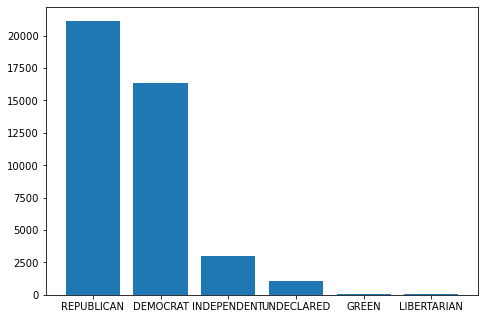

In [27]:

#https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
parties = ['REPUBLICAN','DEMOCRAT','INDEPENDENT','UNDECLARED','GREEN','LIBERTARIAN']
voters = [21170, 16374, 2996, 1100, 40, 39]
ax.bar(parties,voters)
plt.show()

In [70]:
streets = voter_reg[['PARTY', 'SSN', 'STNAME']]

In [ ]:
#replace place of birth v. alderwood to see if there are any trends


In [54]:

#select out the vector for registration date
streets = voter_reg[['PARTY', 'SSN', 'STNAME']]
#first step, summarize count of citizens in each party
grouped_streets = streets.groupby(['STNAME', 'PARTY']).count()
grouped_streets

SSN
STNAME     PARTY           
ABYSSINIAN DEMOCRAT      90
           INDEPENDENT   21
           REPUBLICAN   138
AFGHAN     DEMOCRAT     102
           INDEPENDENT   27
...                     ...
WASHINGTON INDEPENDENT   23
           REPUBLICAN   122
WOLFHOUND  DEMOCRAT      97
           INDEPENDENT   18
           REPUBLICAN   139

[474 rows x 1 columns]

In [69]:
sn = streets['STNAME']['AFGHAN']

KeyError: 'AFGHAN'

In [68]:
sn['INDEX']= sn['STNAME'].str.index('AFGHAN')

KeyError: 'STNAME'

In [42]:
#lets see if this changes at all over time 
type(voter_reg['REGDATE'])

pandas.core.series.Series

In [43]:
#I want to group them by year...
voter_reg['REGDATE']

0        1/1/35
1        1/2/35
2        1/3/35
3        1/4/35
4        1/5/35
          ...  
41718    4/2/04
41719    4/3/04
41720    4/4/04
41721    4/5/04
41722    4/6/04
Name: REGDATE, Length: 41723, dtype: object

In [76]:
pd.to_datetime(voter_reg['REGDATE'])

0       2035-01-01
1       2035-01-02
2       2035-01-03
3       2035-01-04
4       2035-01-05
           ...    
41718   2004-04-02
41719   2004-04-03
41720   2004-04-04
41721   2004-04-05
41722   2004-04-06
Name: REGDATE, Length: 41723, dtype: datetime64[ns]

In [78]:
voter_reg.groupby(['REGDATE'].date.dt.year)

AttributeError: 'list' object has no attribute 'date'

In [70]:
#split off the last two entries 
voter_reg['REGYEAR'] = voter_reg['REGDATE'].str.split('/')
voter_reg['REGYEAR']

0        [1, 1, 35]
1        [1, 2, 35]
2        [1, 3, 35]
3        [1, 4, 35]
4        [1, 5, 35]
            ...    
41718    [4, 2, 04]
41719    [4, 3, 04]
41720    [4, 4, 04]
41721    [4, 5, 04]
41722    [4, 6, 04]
Name: REGYEAR, Length: 41723, dtype: object

In [71]:
voter_reg['REGYEAR'][0][-1]

'35'

In [72]:
import datetime

In [75]:
voter_reg['REGYEAR'] =voter_reg['REGYEAR'].datetime()

AttributeError: 'Series' object has no attribute 'datetime'

In [68]:
for i in range(0, len(voter_reg['REGYEAR'])):
    voter_reg['REGYEAR'][i].replace(to_replace =voter_reg['REGYEAR'][i],value= voter_reg['REGYEAR'][i][-1])

TypeError: replace() takes no keyword arguments

In [10]:
#https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas

def count_elements(seq) -> dict:
    #tally elements from seq.
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0)+1
    return hist
counted = count_elements(regdate)

In [11]:
def ascii_histogram(seq) -> None:
    #"""A horizontal frequency-table/histogram plot."""
    counted = count_elements(seq)
    for k in sorted(counted):
        print('{0:5d} {1}'.format(k, '+' * counted[k]))

In [ ]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=counted, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [71]:
voter_reg

,LAST,FIRST,DOB,POB,SSN,SEX,STNUMBER,STNAME,REGDATE,PARTY
0,SMITH,Alex,1/5/17,Alderwood,970-18-7974,MALE,1355.0,ANGORA,1/1/35,DEMOCRAT
1,JOHNSON,Bonnie,1/7/16,Alderwood,228-59-7899,FEMALE,1773.0,SECOND,1/2/35,DEMOCRAT
2,WILLIAMS,Charley,2/7/13,Utah,176-01-4411,MALE,155.0,BRITTANY,1/3/35,DEMOCRAT
3,JONES,Danielle,11/5/15,Alderwood,624-29-3132,FEMALE,13.0,COLLIE,1/4/35,DEMOCRAT
4,BROWN,Earl,1/10/16,PENNSYLVANIA,882-79-8502,MALE,671.0,SAGUARO,1/5/35,REPUBLICAN
...,...,...,...,...,...,...,...,...,...,...
41718,HELLAND,KATHY,5/8/82,ARIZONA,919-38-7202,FEMALE,251.0,FOURTH,4/2/04,REPUBLICAN
41719,BOSQUET,JOHN,12/25/80,Montana,787-64-8187,MALE,119.0,SWEET PEA,4/3/04,REPUBLICAN
41720,SHOEMAKER,AMY,4/9/85,ARIZONA,926-35-4584,FEMALE,10.0,COONHOUND,4/4/04,REPUBLICAN
41721,OSBORN,ANDY,9/23/83,Utah,694-38-3420,MALE,15.0,SAFFLOWER,4/5/04,REPUBLICAN


In [84]:
oak_voters = voter_reg[voter_reg['STNAME'] == ("OAK")]

In [87]:
oak_voters

,LAST,FIRST,DOB,POB,SSN,SEX,STNUMBER,STNAME,REGDATE,PARTY
263,CHOU,ABIGAIL,7/22/16,Wyoming,012-73-9098,FEMALE,10.0,OAK,9/21/35,DEMOCRAT
518,NI,JONATHON,7/8/14,Alderwood,309-96-9682,MALE,280.0,OAK,6/2/36,INDEPENDENT
629,VARLEY,Irene,10/27/14,Mexico,045-18-5320,FEMALE,465.0,OAK,9/21/36,REPUBLICAN
1116,PEREZ,ALEXANDER,10/14/14,Oregon,130-16-9504,MALE,1843.0,OAK,1/21/38,INDEPENDENT
1117,EASTER,TRACY,2/27/16,Alderwood,614-41-9622,FEMALE,710.0,OAK,1/22/38,DEMOCRAT
...,...,...,...,...,...,...,...,...,...,...
39344,WALKER,MARY,5/30/79,ARIZONA,950-84-8443,FEMALE,440.0,OAK,4/24/01,REPUBLICAN
39372,BUTCHER,MARSHA,11/8/80,Alderwood,729-47-2207,FEMALE,363.0,OAK,5/22/01,DEMOCRAT
39863,VANNICE,MOHAMMAD,3/8/82,Oregon,124-71-9558,MALE,2032.0,OAK,9/19/02,DEMOCRAT
39979,BERG,MARK,8/13/79,Alderwood,812-33-1168,MALE,1134.0,OAK,11/20/02,REPUBLICAN


In [91]:
oak_voters.columns = oak_voters.columns.str.strip()

In [92]:
#side by side barplot of republican versus democrats
#select out the vector for registration date
#oak_voters = oak_voters['PARTY', 'SSN']
#first step, summarize count of citizens in each party
oak_voters.groupby(by = 'PARTY').count()

,LAST,FIRST,DOB,POB,SSN,SEX,STNUMBER,STNAME,REGDATE
PARTY,,,,,,,,,
DEMOCRAT,102,102,102,102,102,102,102,102,102
INDEPENDENT,22,22,22,22,22,22,22,22,22
REPUBLICAN,141,141,141,141,141,141,141,141,141


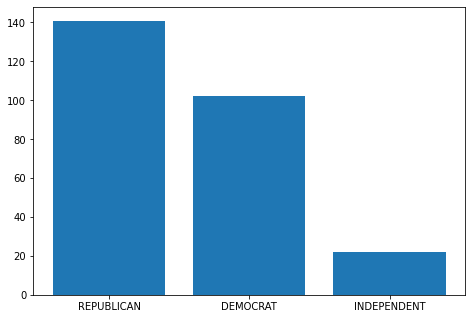

In [100]:

#https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
parties = ['REPUBLICAN','DEMOCRAT','INDEPENDENT']
oak_voters = [141, 102, 22]
ax.bar(parties,oak_voters)
plt.show()

In [98]:
pob_oak_voters = oak_voters.groupby(by = 'POB').count()
pob_oak_voters_string = pob_oak_voters['POB']

KeyError: 'POB'

In [96]:
pob_oak_voters = pob_oak_voters(to_replace = ('POB'!= 'Alderwood'), value = 'not_alder')

TypeError: 'DataFrame' object is not callable